# Single-cell analysis

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read the data from matrix file, .mtx in the dir
adata = sc.read_10x_mtx('Data/Single_Cell_Analysis/GSE267926_RAW/GSM8281694_P28_WT_2',  
    var_names='gene_symbols',
    cache=True
)

In [40]:
sc.pp.filter_cells(adata, min_genes=200)
# Cells with less than 200 gene is remove

sc.pp.filter_genes(adata, min_cells=3)
# Gene exist less than 3 cell is removed

In [41]:
var_names = adata.var_names
adata.var['Mt']=adata.var_names.str.startswith('mt-')
# Look and add column for mitochondrial genes

In [42]:
sc.pp.calculate_qc_metrics(adata, 
                         qc_vars=['Mt'], 
                         percent_top=None, 
                         inplace=True)
# Calculate the quality control metrics

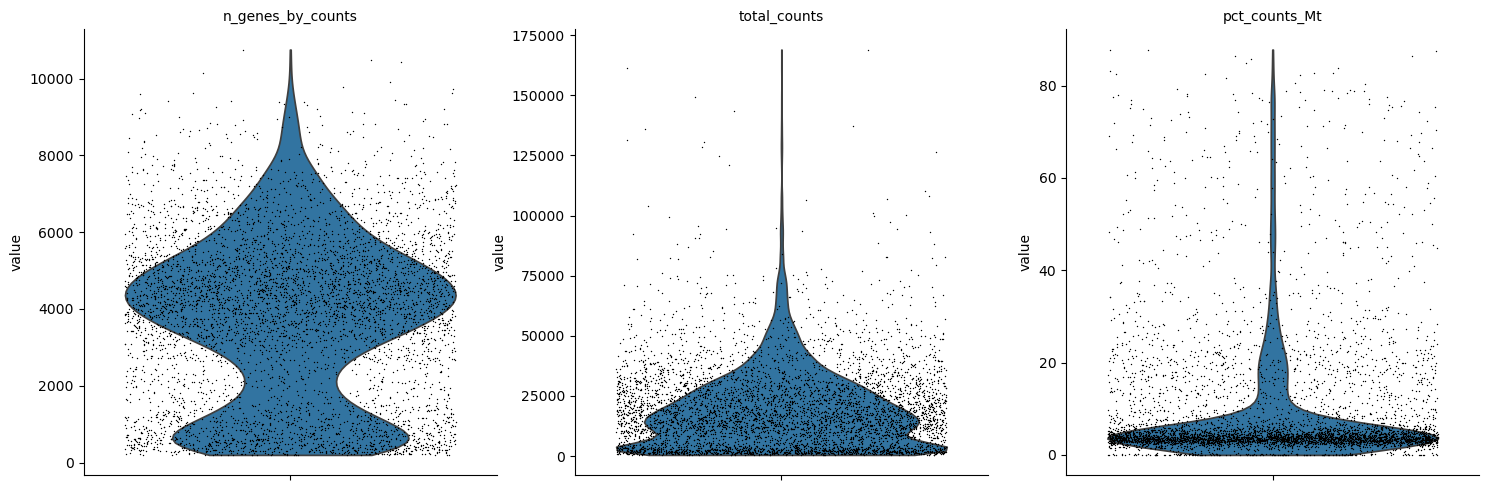

In [43]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_Mt'],
             jitter=0.4, multi_panel=True)
# Plot the violin plot for the quality control metrics

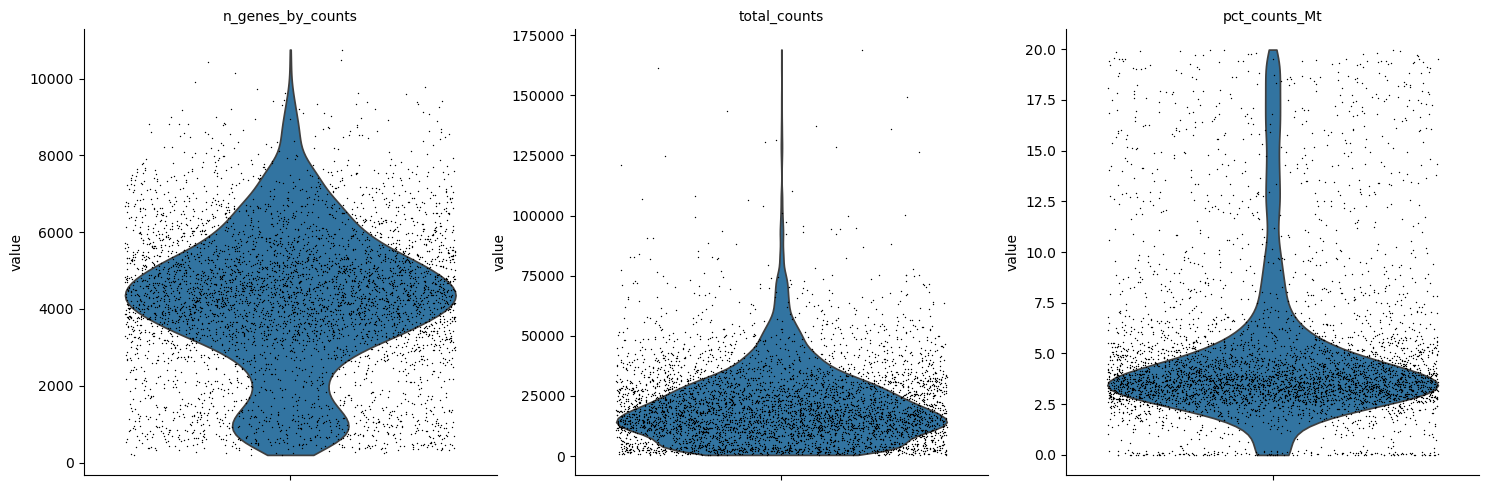

In [44]:
adata = adata[adata.obs.pct_counts_Mt < 20]
# Remove cells with more than 20% mitochondrial genes, too much mitochondrial genes is not good, indicates the cell is dead

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_Mt'],
             jitter=0.4, multi_panel=True)



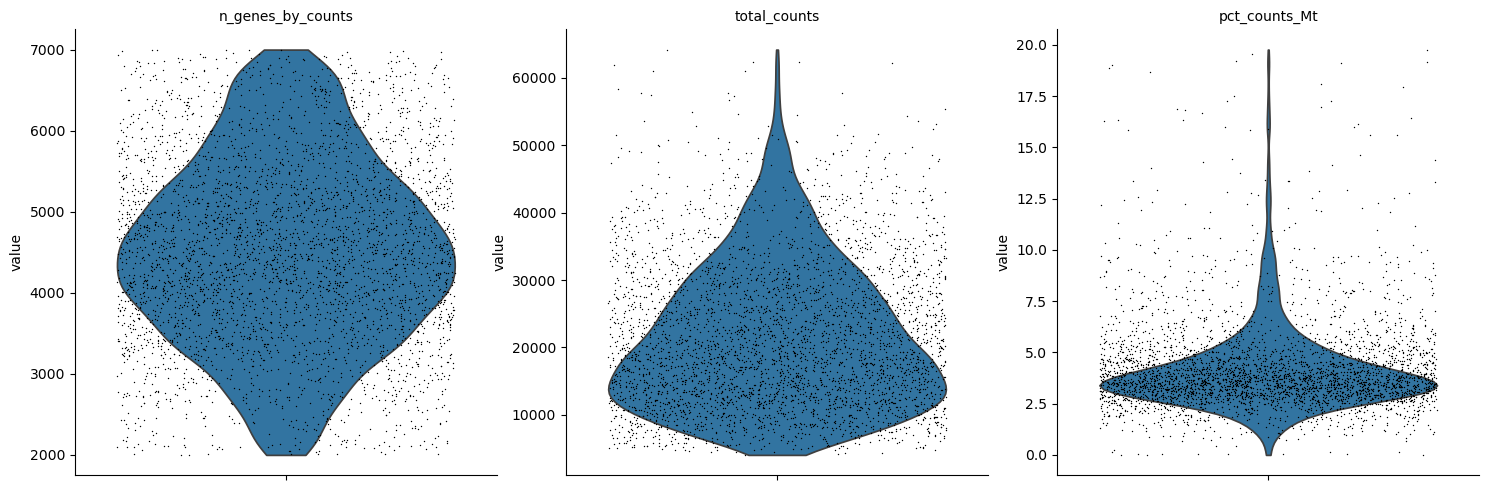

In [45]:
adata = adata[adata.obs.n_genes_by_counts < 7000]
adata = adata[adata.obs.n_genes_by_counts > 2000]
# Remove cells with more than 7000 genes or less than 2000 genes, which are outliers

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_Mt'],
             jitter=0.4, multi_panel=True)

In [46]:
sc.pp.normalize_total(adata, target_sum=1e4)
# Normalize the data to max 10000

sc.pp.log1p(adata)
# Logarithmize the data for better visualization

/home/chongcfu/miniconda3/envs/bio_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Clustering

In [47]:
adata.var
# Show the data

,gene_ids,feature_types,n_cells,Mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
Xkr4,ENSMUSG00000051951,Gene Expression,369,False,369,0.100074,0.095377,93.174251,541.0,6.295266
Gm1992,ENSMUSG00000089699,Gene Expression,3,False,3,0.000925,0.000924,99.944506,5.0,1.791759
Gm19938,ENSMUSG00000102331,Gene Expression,612,False,612,0.242138,0.216834,88.679245,1309.0,7.177783
Rp1,ENSMUSG00000025900,Gene Expression,48,False,48,0.020163,0.019962,99.112098,109.0,4.700480
Sox17,ENSMUSG00000025902,Gene Expression,28,False,28,0.033851,0.033291,99.482057,183.0,5.214936
...,...,...,...,...,...,...,...,...,...,...
Ccl21a-1,ENSMUSG00000095320,Gene Expression,4,False,4,0.000740,0.000740,99.926008,4.0,1.609438
Gm10931,ENSMUSG00000094350,Gene Expression,8,False,8,0.001480,0.001479,99.852016,8.0,2.197225
CT868723.1,ENSMUSG00000096237,Gene Expression,7,False,7,0.001295,0.001294,99.870514,7.0,2.079442
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,220,False,220,0.043470,0.042552,95.930448,235.0,5.463832


In [48]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Find the highly variable genes

In [49]:
adata.var[adata.var.highly_variable == True]
# Show the highly variable genes (3659 out of 24909)

,gene_ids,feature_types,n_cells,Mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm
Gm19938,ENSMUSG00000102331,Gene Expression,612,False,612,0.242138,0.216834,88.679245,1309.0,7.177783,True,0.125244,0.767882,0.774915
Sox17,ENSMUSG00000025902,Gene Expression,28,False,28,0.033851,0.033291,99.482057,183.0,5.214936,True,0.019672,2.368051,2.741681
St18,ENSMUSG00000033740,Gene Expression,165,False,165,0.071957,0.069486,96.947836,389.0,5.966147,True,0.052424,1.268349,1.390039
1700034P13Rik,ENSMUSG00000097893,Gene Expression,340,False,340,0.140954,0.131865,93.710692,762.0,6.637258,True,0.075833,1.269611,1.391590
Cspp1,ENSMUSG00000056763,Gene Expression,2600,False,2600,1.128376,0.755359,51.905290,6100.0,8.716208,True,0.476930,0.636623,0.517040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gpm6b,ENSMUSG00000031342,Gene Expression,409,False,409,0.193859,0.177191,92.434332,1048.0,6.955593,True,0.111302,0.920281,0.962228
Arhgap6,ENSMUSG00000031355,Gene Expression,134,False,134,0.035701,0.035079,97.521273,193.0,5.267858,True,0.020987,0.866890,0.896606
Amelx,ENSMUSG00000031354,Gene Expression,64,False,64,0.154273,0.143471,98.816130,834.0,6.727432,True,0.047875,2.969504,3.480927
AC168977.1,ENSMUSG00000079808,Gene Expression,103,False,103,0.061968,0.060124,98.094710,335.0,5.817111,True,0.034443,1.614486,1.815475


In [50]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]


In [51]:
adata.X

<3751x3659 sparse matrix of type '<class 'numpy.float32'>'
	with 1873792 stored elements in Compressed Sparse Column format>

In [52]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_Mt'])
adata.X # Visualize the difference


/home/chongcfu/miniconda3/envs/bio_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:668: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


array([[-0.07749375, -0.00643509, -0.02546332, ..., -0.01258506,
        -0.01656781,  0.07749295],
       [-0.07675669, -0.00629111, -0.0295063 , ..., -0.00923227,
        -0.01437818, -0.65388041],
       [-0.07774108, -0.00619453, -0.03275751, ..., -0.00757461,
        -0.01348455, -0.67821037],
       ...,
       [-0.07638918, -0.00634361, -0.02780021, ..., -0.01020029,
        -0.01492908, -0.64038602],
       [-0.08735064, -0.00614848, -0.03763993, ..., -0.01043967,
        -0.01661361,  0.23537093],
       [-0.07999989, -0.00638102, -0.0279962 , ..., -0.01243893,
        -0.01682795,  0.27072167]])

In [ ]:
sc.pp.scale(adata, max_value=10)
adata.X # Visualize the scaled data


array([[-0.31383698, -0.06239996, -0.15132639, ..., -0.08239338,
        -0.12273482,  0.1363777 ],
       [-0.31085201, -0.06100386, -0.17535348, ..., -0.06044297,
        -0.10651401, -1.15074613],
       [-0.31483863, -0.06006732, -0.19467515, ..., -0.04959038,
        -0.09989396, -1.19356376],
       ...,
       [-0.30936367, -0.0615129 , -0.16521436, ..., -0.06678051,
        -0.11059507, -1.12699772],
       [-0.35375577, -0.05962076, -0.22369095, ..., -0.06834774,
        -0.12307408,  0.41422281],
       [-0.32398645, -0.06187566, -0.16637911, ..., -0.08143668,
        -0.12466198,  0.47643562]])

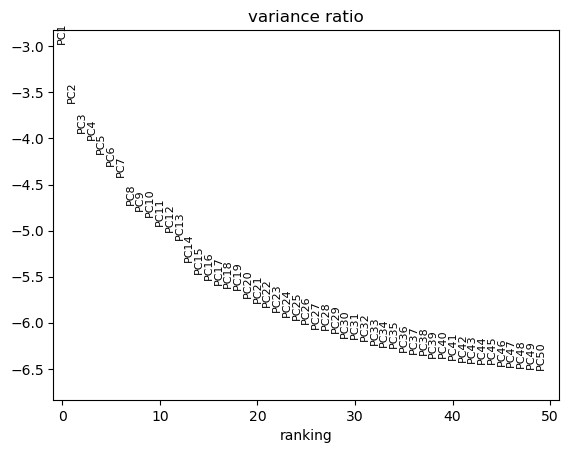

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)
# See hows the component carries the information

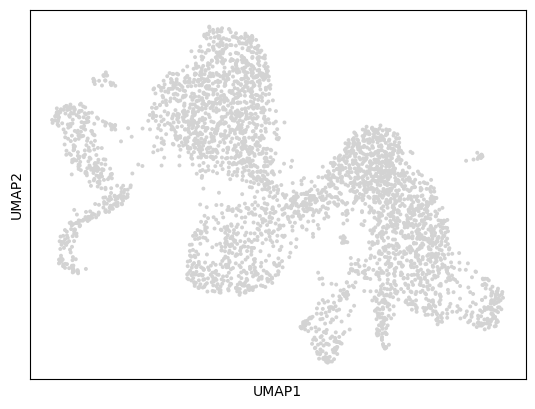

In [ ]:
sc.pp.neighbors(adata, n_pcs=50, n_neighbors=30)
# Calculate the knn with 50 pcs
sc.tl.umap(adata)
# Calculate the UMAP
sc.pl.umap(adata)
# Plot the UMAP

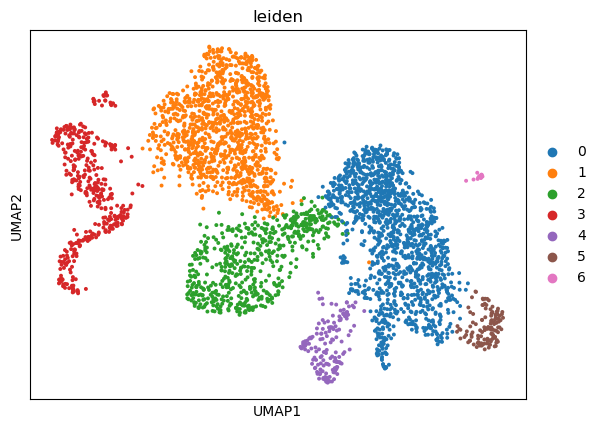

In [ ]:
sc.tl.leiden(adata,resolution=0.25)
# Cluster the data
sc.pl.umap(adata, color=['leiden'])
# Plot the cluster

Find Marker


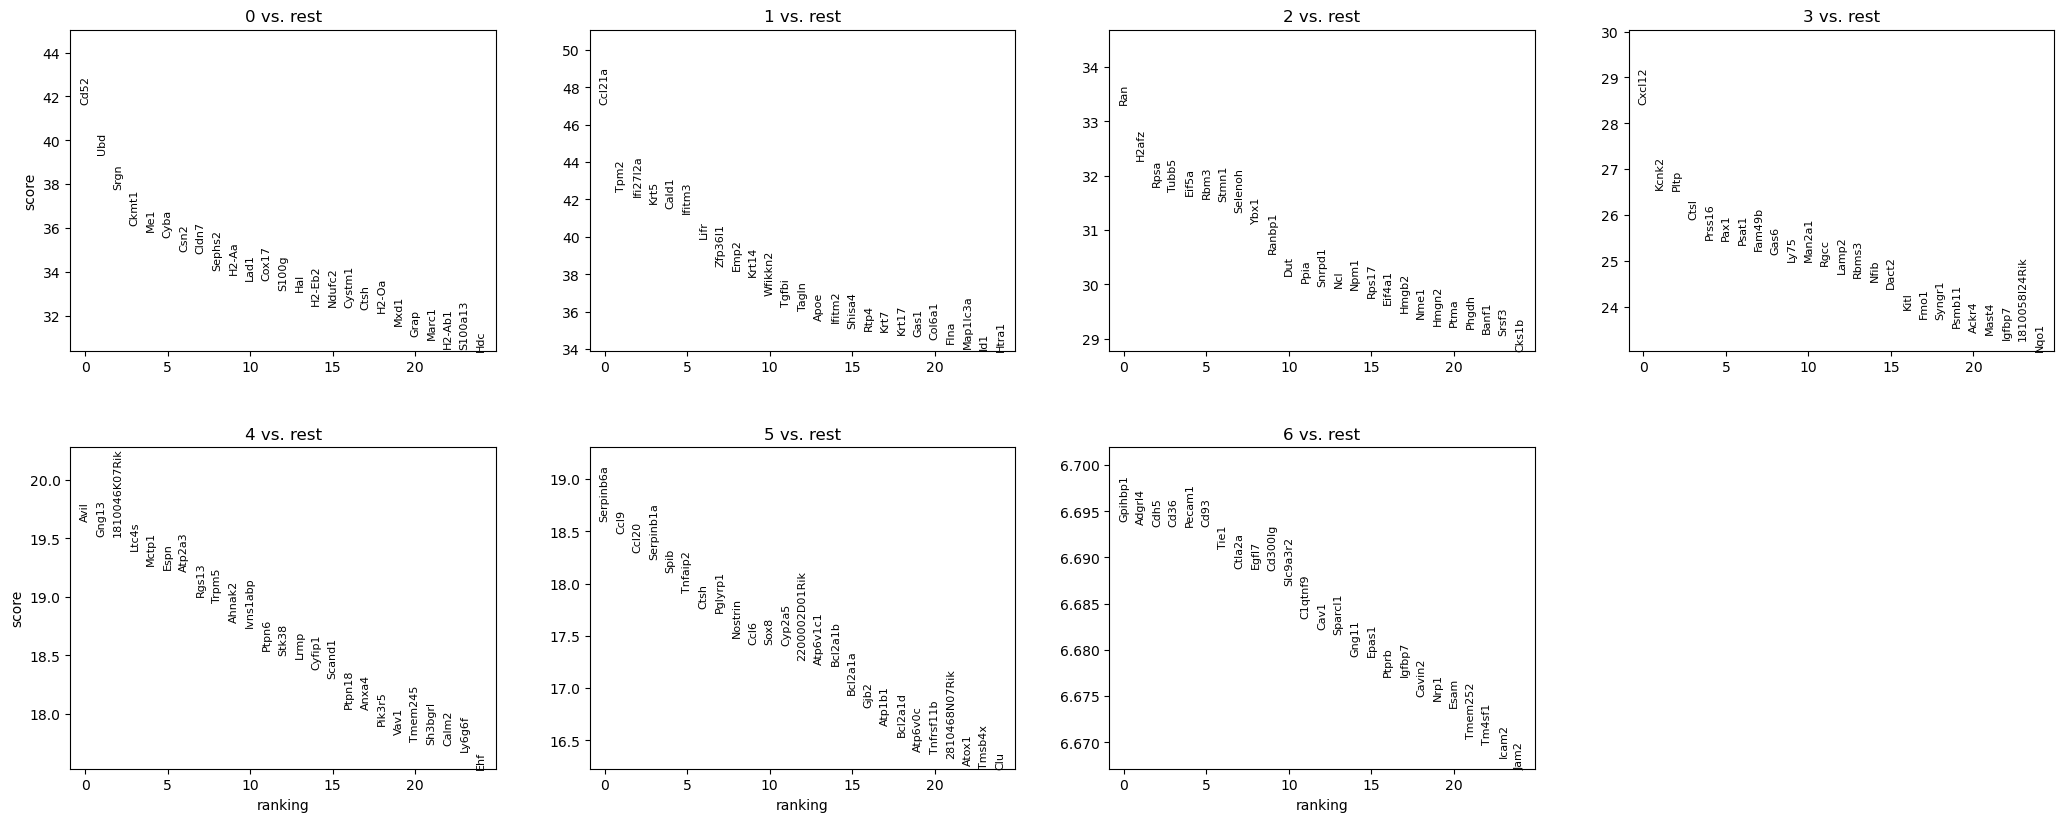

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
# Rank the genes in the cluster

In [ ]:
adata.uns['rank_genes_groups']['names'][0]
# Show the genes in the cluster 0

np.record(('Cd52', 'Ccl21a', 'Ran', 'Cxcl12', 'Avil', 'Serpinb6a', 'Gpihbp1'), dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O')])

In [ ]:
clusters = adata.uns['rank_genes_groups']['names'].dtype.names

combined_df=pd.DataFrame()
for cluster in clusters:
    # Extract data from adata into df
    marker_df = pd.DataFrame({
        'Genes': adata.uns['rank_genes_groups']['names'][cluster],
        'Scores': adata.uns['rank_genes_groups']['scores'][cluster],
        'Log2FC': adata.uns['rank_genes_groups']['logfoldchanges'][cluster],
        'Pvals': adata.uns['rank_genes_groups']['pvals_adj'][cluster],
        'Cluster': [cluster] * len(adata.uns['rank_genes_groups']['names'][cluster])
    })
    marker_df = marker_df[0:10]
    combined_df = pd.concat([combined_df, marker_df])


In [ ]:
combined_df #Visualize the df


,Genes,Scores,Log2FC,Pvals,Cluster
0,Cd52,41.667477,4.257719,0.000000e+00,0
1,Ubd,39.370831,3.019651,0.000000e+00,0
2,Srgn,37.759781,2.658458,0.000000e+00,0
3,Ckmt1,36.142204,2.949128,1.535732e-282,0
4,Me1,35.854630,2.869217,3.527104e-278,0
...,...,...,...,...,...
5,Cd93,6.693408,11.869625,2.249457e-08,6
6,Tie1,6.691019,10.744292,2.249457e-08,6
7,Ctla2a,6.688869,10.535923,2.249457e-08,6
8,Egfl7,6.688869,9.545493,2.249457e-08,6
